# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [38]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 625


---

# Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [39]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key



# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city

    city_url = url + '&q=' + city 

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
       

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather ["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | aklavik
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | fortuna
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | alta floresta
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | portland
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | bundibugyo
Processing Record 15 of Set 1 | licata
Processing Record 16 of Set 1 | dzhusaly
City not found. Skipping...
Processing Record 17 of Set 1 | torbay
Processing Record 18 of Set 1 | dormidontovka
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | finschhafen
Processing Record 21 of Set 1 | castro
Processing Record 22 of Set 1 | chulym
Processing Record

Processing Record 37 of Set 4 | rocha
Processing Record 38 of Set 4 | hasaki
Processing Record 39 of Set 4 | saskylakh
Processing Record 40 of Set 4 | capitao poco
Processing Record 41 of Set 4 | chokurdakh
Processing Record 42 of Set 4 | amuntai
Processing Record 43 of Set 4 | bosaso
Processing Record 44 of Set 4 | zhezkazgan
Processing Record 45 of Set 4 | komsomolskiy
Processing Record 46 of Set 4 | saint-pierre
Processing Record 47 of Set 4 | gidole
Processing Record 48 of Set 4 | vao
Processing Record 49 of Set 4 | ust-ilimsk
Processing Record 0 of Set 5 | ancud
Processing Record 1 of Set 5 | progreso
Processing Record 2 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 3 of Set 5 | afmadu
City not found. Skipping...
Processing Record 4 of Set 5 | richards bay
Processing Record 5 of Set 5 | vanavara
Processing Record 6 of Set 5 | kodiak
Processing Record 7 of Set 5 | kambove
Processing Record 8 of Set 5 | yangambi
Processing Record 9 of Set 5 | bima
Processing Recor

Processing Record 26 of Set 8 | grindavik
Processing Record 27 of Set 8 | taoudenni
Processing Record 28 of Set 8 | gisborne
Processing Record 29 of Set 8 | san ramon
Processing Record 30 of Set 8 | mount isa
Processing Record 31 of Set 8 | olafsvik
Processing Record 32 of Set 8 | srednekolymsk
Processing Record 33 of Set 8 | soyo
Processing Record 34 of Set 8 | chengde
Processing Record 35 of Set 8 | natal
Processing Record 36 of Set 8 | rodrigues alves
Processing Record 37 of Set 8 | narrabri
Processing Record 38 of Set 8 | xiuyan
Processing Record 39 of Set 8 | biltine
Processing Record 40 of Set 8 | dera din panah
City not found. Skipping...
Processing Record 41 of Set 8 | henties bay
Processing Record 42 of Set 8 | dharmanagar
Processing Record 43 of Set 8 | east london
Processing Record 44 of Set 8 | katsuura
Processing Record 45 of Set 8 | poronaysk
Processing Record 46 of Set 8 | saleaula
City not found. Skipping...
Processing Record 47 of Set 8 | moose factory
Processing Recor

Processing Record 17 of Set 12 | matay
Processing Record 18 of Set 12 | namie
Processing Record 19 of Set 12 | novoasbest
Processing Record 20 of Set 12 | mazagao
Processing Record 21 of Set 12 | formoso do araguaia
City not found. Skipping...
Processing Record 22 of Set 12 | griffith
Processing Record 23 of Set 12 | keti bandar
Processing Record 24 of Set 12 | fort collins
Processing Record 25 of Set 12 | anadyr
Processing Record 26 of Set 12 | dunedin
Processing Record 27 of Set 12 | benguela
Processing Record 28 of Set 12 | kokopo
Processing Record 29 of Set 12 | karasjok
Processing Record 30 of Set 12 | sao joao da barra
Processing Record 31 of Set 12 | innisfail
Processing Record 32 of Set 12 | candelaria
Processing Record 33 of Set 12 | bulawayo
Processing Record 34 of Set 12 | dong hoi
Processing Record 35 of Set 12 | chalchihuites
Processing Record 36 of Set 12 | batagay-alyta
Processing Record 37 of Set 12 | puerto rico
Processing Record 38 of Set 12 | tagusao
Processing Recor

In [40]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,56.41,88,25,1.19,ZA,1669002142
1,port elizabeth,-33.9180,25.5701,60.31,95,0,4.61,ZA,1669002142
2,aklavik,68.2191,-135.0107,7.50,97,100,5.61,CA,1669002143
3,busselton,-33.6500,115.3333,72.90,37,0,3.42,AU,1669002143
4,fortuna,40.5982,-124.1573,45.52,92,0,6.91,US,1669002143
...,...,...,...,...,...,...,...,...,...
575,cairns,-16.9167,145.7667,103.06,71,40,10.36,AU,1669002270
576,lodja,-3.4833,23.4333,67.57,99,93,1.03,CD,1669002313
577,hailun,47.4500,126.9333,24.22,31,0,14.70,CN,1669002313
578,nara,34.6851,135.8049,67.50,45,50,4.76,JP,1669002313


In [41]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,56.41,88,25,1.19,ZA,1669002142
1,port elizabeth,-33.9180,25.5701,60.31,95,0,4.61,ZA,1669002142
2,aklavik,68.2191,-135.0107,7.50,97,100,5.61,CA,1669002143
3,busselton,-33.6500,115.3333,72.90,37,0,3.42,AU,1669002143
4,fortuna,40.5982,-124.1573,45.52,92,0,6.91,US,1669002143


In [42]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City")

In [43]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City")

# Display sample data
city_data_df

,City.1,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,56.41,88,25,1.19,ZA,1669002142
1,port elizabeth,-33.9180,25.5701,60.31,95,0,4.61,ZA,1669002142
2,aklavik,68.2191,-135.0107,7.50,97,100,5.61,CA,1669002143
3,busselton,-33.6500,115.3333,72.90,37,0,3.42,AU,1669002143
4,fortuna,40.5982,-124.1573,45.52,92,0,6.91,US,1669002143
...,...,...,...,...,...,...,...,...,...
575,cairns,-16.9167,145.7667,103.06,71,40,10.36,AU,1669002270
576,lodja,-3.4833,23.4333,67.57,99,93,1.03,CD,1669002313
577,hailun,47.4500,126.9333,24.22,31,0,14.70,CN,1669002313


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

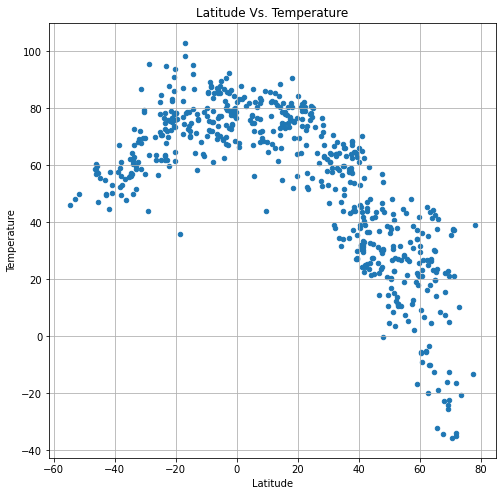

In [47]:
# Build scatter plot for latitude vs. temperature

city_data_df.plot(kind= "scatter", x="Lat", y= "Max Temp", grid = True, figsize= (8,8), 
                  title="Latitude Vs. Temperature")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

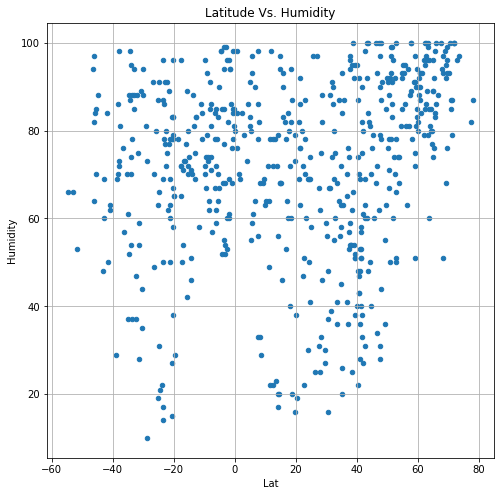

In [48]:
# Build the scatter plots for latitude vs. humidity

city_data_df.plot(kind= "scatter", x="Lat", y= "Humidity", grid = True, figsize= (8,8), 
                  title="Latitude Vs. Humidity")

# Incorporate the other graph properties


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

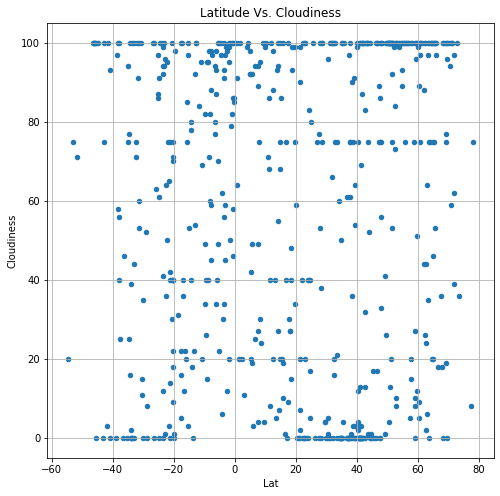

In [49]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind= "scatter", x="Lat", y= "Cloudiness", grid = True, figsize= (8,8), 
                  title="Latitude Vs. Cloudiness")


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

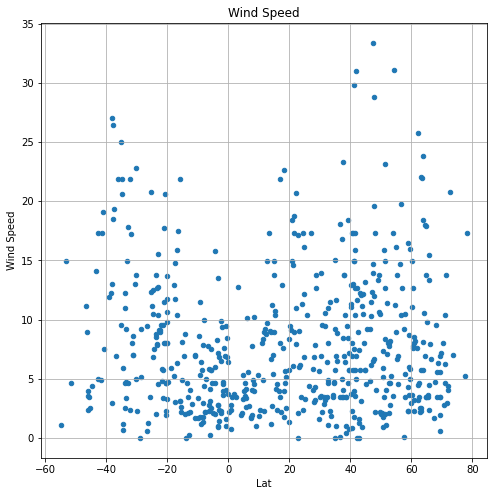

In [50]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind= "scatter", x="Lat", y= "Wind Speed", grid = True, figsize= (8,8), 
                  title="Wind Speed")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat']>=0])

# Display sample data
northern_hemi_df.head()

,City.1,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,,
0,sabha,27.0377,14.4283,68.88,18,63,10.20,LY,1668889634
1,garoua,9.3000,13.4000,82.80,24,8,4.47,CM,1668889635
5,dikson,73.5069,80.5464,-15.63,100,90,5.73,RU,1668889636
8,butaritari,3.0707,172.7902,80.76,72,51,19.17,KI,1668889638
9,provideniya,64.3833,-173.3000,25.68,83,100,6.11,RU,1668889591


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat']<0])

# Display sample data
southern_hemi_df.head()

,City.1,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,,
2,geraldton,-28.7667,114.6000,50.41,87,0,6.91,AU,1668889635
3,mahebourg,-20.4081,57.7000,71.89,78,40,2.30,MU,1668889635
4,bengkulu,-3.8004,102.2655,74.17,91,100,5.73,ID,1668889636
6,kalabo,-14.9700,22.6814,79.75,33,9,4.45,ZM,1668889636
7,rikitea,-23.1203,-134.9692,70.88,68,89,10.04,PF,1668889637


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7422446283269682


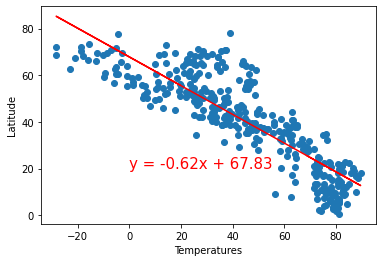

In [92]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Max Temp']
y_values = northern_hemi_df["Lat"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")


plt.xlabel('Temperatures')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.3592728578675763


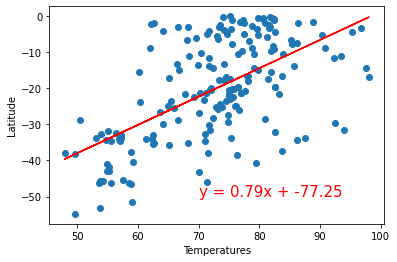

In [91]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Max Temp']
y_values = southern_hemi_df["Lat"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(70,-50),fontsize=15,color="red")


plt.xlabel('Temperatures')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# **Discussion about the linear relationship:** 

The Temperatures in the Nothern Hemi are much cooler than the Southern Hemi.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.13536617881362817


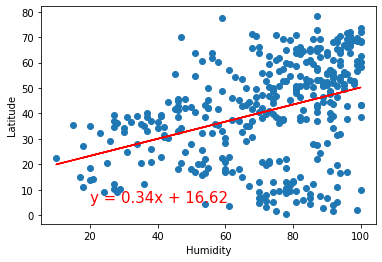

In [99]:
# Northern Hemisphere
x_values = northern_hemi_df['Humidity']
y_values = northern_hemi_df["Lat"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,5),fontsize=15,color="red")


plt.xlabel('Humidity')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.03248867167207877


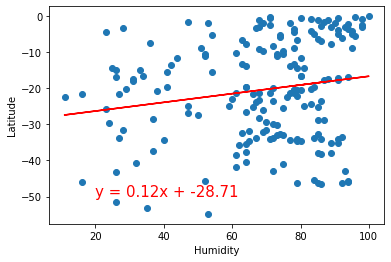

In [97]:
# Southern Hemisphere
x_values = southern_hemi_df['Humidity']
y_values = southern_hemi_df["Lat"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,-50),fontsize=15,color="red")


plt.xlabel('Humidity')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.04139090834110939


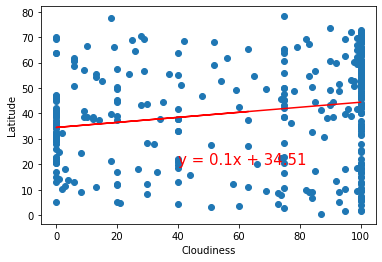

In [83]:
# Northern Hemisphere
x_values = northern_hemi_df['Cloudiness']
y_values = northern_hemi_df["Lat"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")


plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.10653662590437146


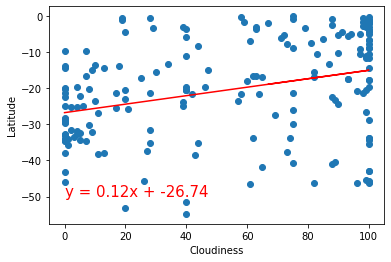

In [81]:
# Southern Hemisphere
x_values = southern_hemi_df['Cloudiness']
y_values = southern_hemi_df["Lat"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-50),fontsize=15,color="red")


plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.03034887732834318


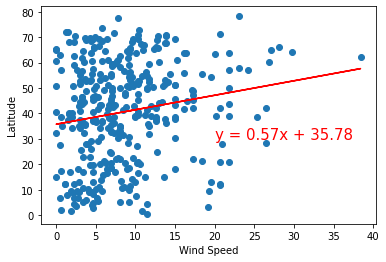

In [75]:
# Northern Hemisphere
x_values = northern_hemi_df['Wind Speed']
y_values = northern_hemi_df["Lat"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")


plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.17970344080969985


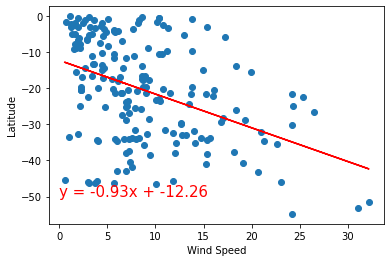

In [98]:
# Southern Hemisphere
x_values = southern_hemi_df['Wind Speed']
y_values = southern_hemi_df["Lat"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-50),fontsize=15,color="red")


plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE